# Lab Exercise - Linear Regresssion Model (Car Price Prediction)

In [2]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Data Preparation:

In [4]:
# Loading the Dataset
data = pd.read_csv(r"\Users\Muhammad\Downloads\CarPrice_Assignment.csv")

# 2. Looking into the Data set

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [8]:
# There are 205 Rows and 26 Coloumns
data.shape

(205, 26)

In [9]:
type(data)

pandas.core.frame.DataFrame

# 2.1 Data Preprocessing:

In [10]:
# Handle missing values, if any, using appropriate techniques (e.g., mean/median imputation).

#print(np.sum(pd.isna(data)))
# both pd.isna and pd.isnull function are same, isnull is alias for isna...

print(np.sum(pd.isnull(data)))


# Since there are no NULL values in the dataset therefore, no need to handle null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


# 3. Handling Categorical Values:

# 3.1 - Using One-Hot Encoder:

In [8]:
# If we transform the Categorical values with One Hot encoder then it would create new coloumns for numeric values
# In this case our size of data increases, that can affect performance negitively
# However, when we have too few features (Qs, input coloumns = x values) then increasing the numbers of columns make data more 
# robuts

df = []
df = pd.get_dummies(data)
#df.head()
df.shape

(205, 201)

In [24]:
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


# 3.2 - Using Label Encoder Encoder:

In [26]:
# we are replacing the categorial values with numeric values right its place using Label Encoder

labelencoder = LabelEncoder()

data['fueltype'] = labelencoder.fit_transform(data['fueltype']) 
data['aspiration'] = labelencoder.fit_transform(data['aspiration']) 
data['carbody'] = labelencoder.fit_transform(data['carbody']) 
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel']) 
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation']) 
data['fuelsystem'] = labelencoder.fit_transform(data['fuelsystem']) 
data['enginetype'] = labelencoder.fit_transform(data['enginetype']) 
data['cylindernumber'] = labelencoder.fit_transform(data['cylindernumber']) 
data['CarName'] = labelencoder.fit_transform(data['CarName']) 
data['doornumber'] = labelencoder.fit_transform(data['doornumber']) 


In [27]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,143,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,19,25,22625.0


# Exploring the data Analysis

In [28]:
data.describe() # returns dtaframe containing basic statics

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [29]:
a = data.describe() #returns a dataframe containing basic stats of dataframe

In [30]:
type(a)

pandas.core.frame.DataFrame

In [31]:
b=a.get("enginesize")

In [32]:
type(b)

pandas.core.series.Series

In [33]:
b.get("mean")

126.90731707317073

### data.info()

In [46]:
#sns.pairplot??

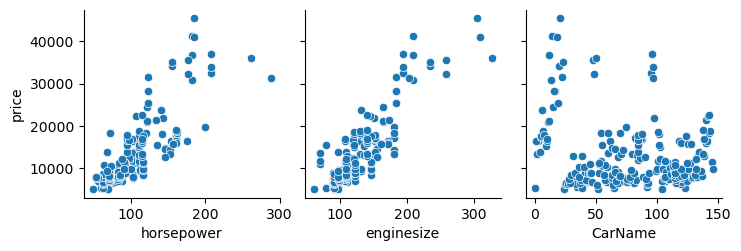

In [36]:
sns.pairplot(data, x_vars=['horsepower', 'enginesize', 'CarName'], y_vars='price', kind='scatter')
plt.show()

In [37]:
data.corr()
#b.corr()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


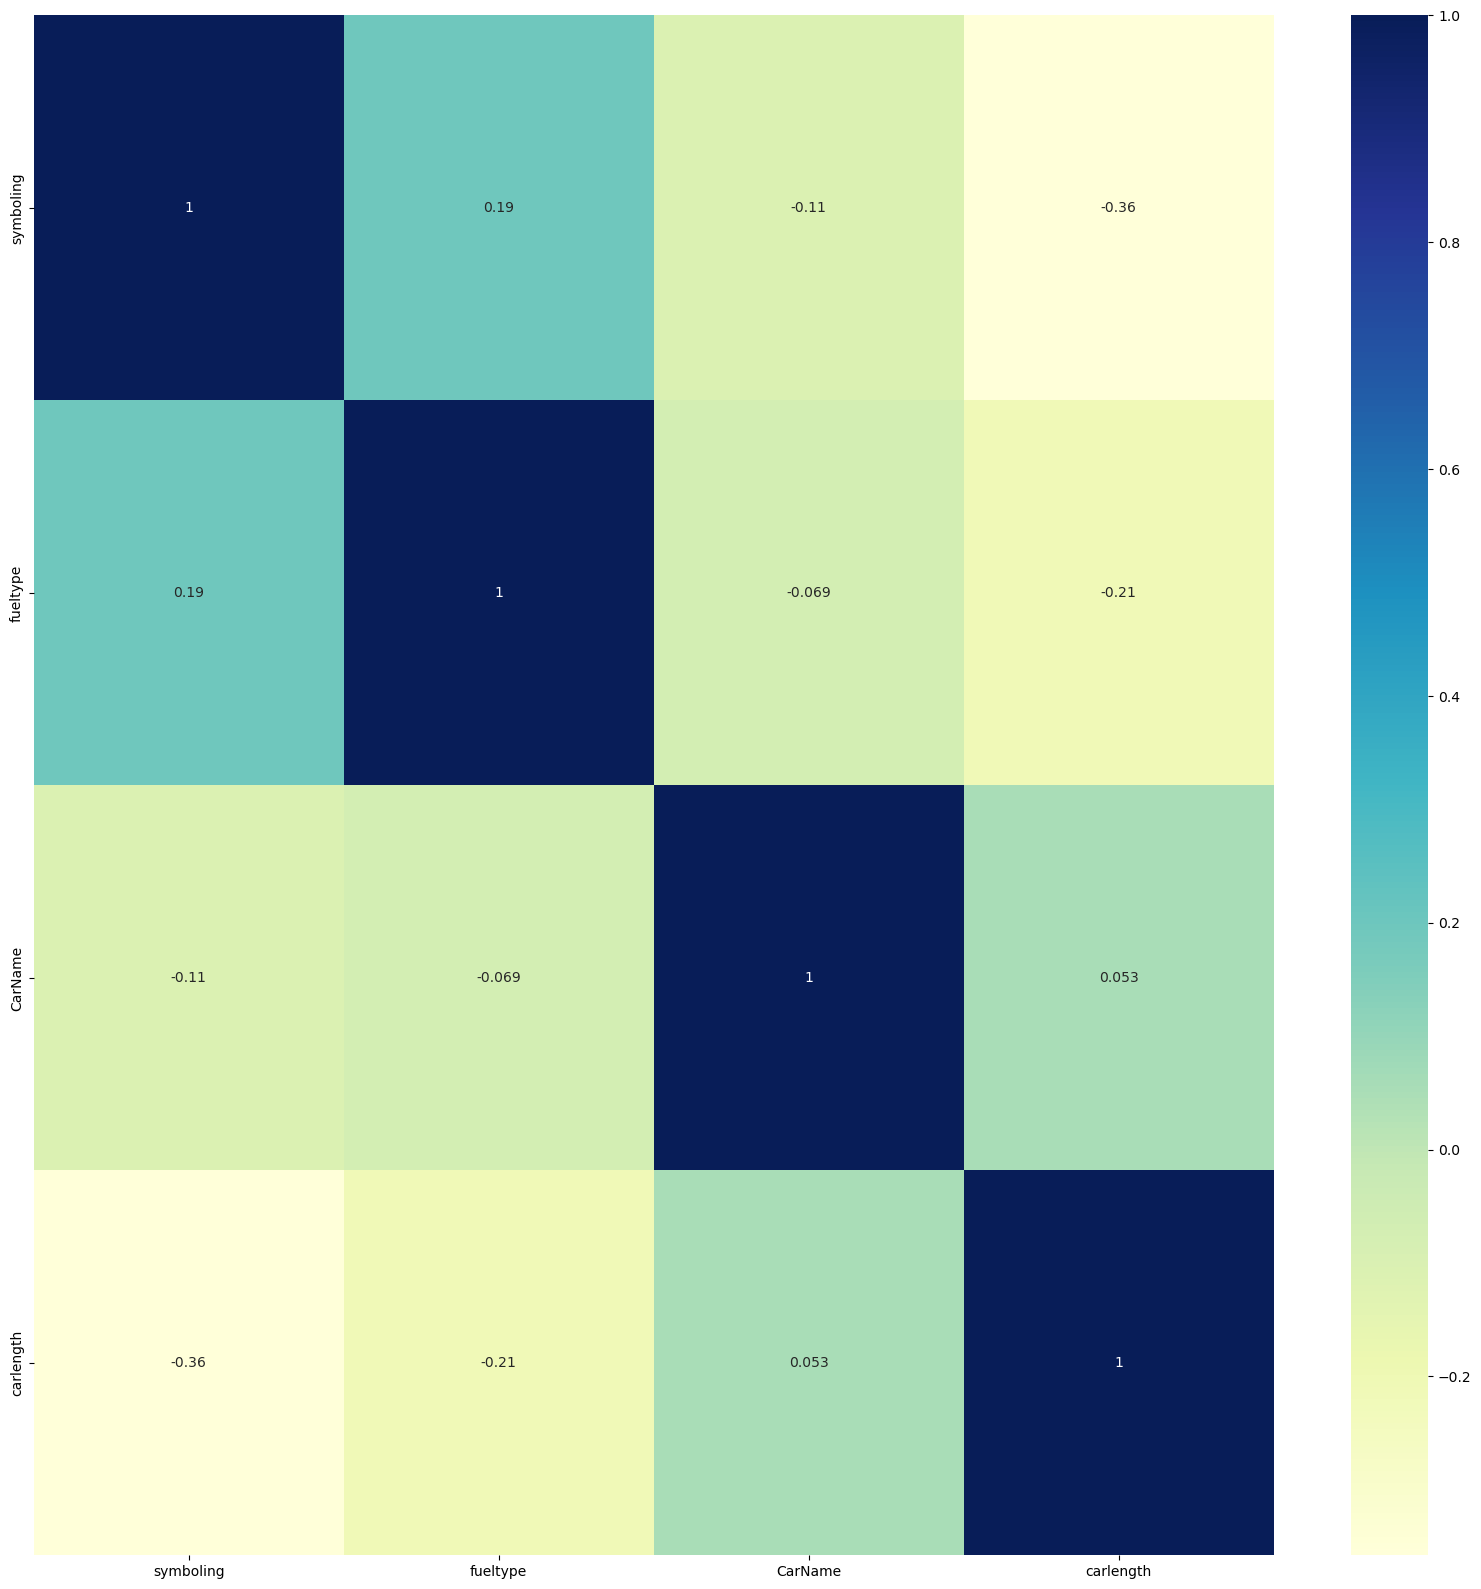

In [53]:
# If you want to use selected features to draw heath map then use following code using index of X values
corrmat = data.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
print(top_corr_features)
g=sns.heatmap(data[top_corr_features[[1,3,2,10]]].corr(),annot=True,cmap="YlGnBu")



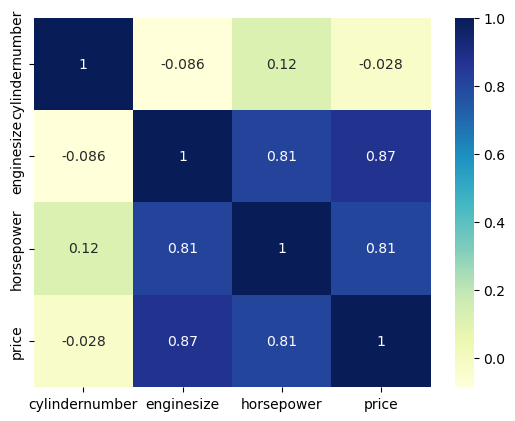

In [56]:
# If you want to use selected features to draw heath map then use following code using X values name
corrmat = data.corr()
top_corr_features= corrmat.index
t = pd.Index(["cylindernumber", "enginesize", "horsepower", "price"])
#plt.figure(figsize=(20,20))
#print(top_corr_features)
g=sns.heatmap(data[t].corr(),annot=True,cmap="YlGnBu")

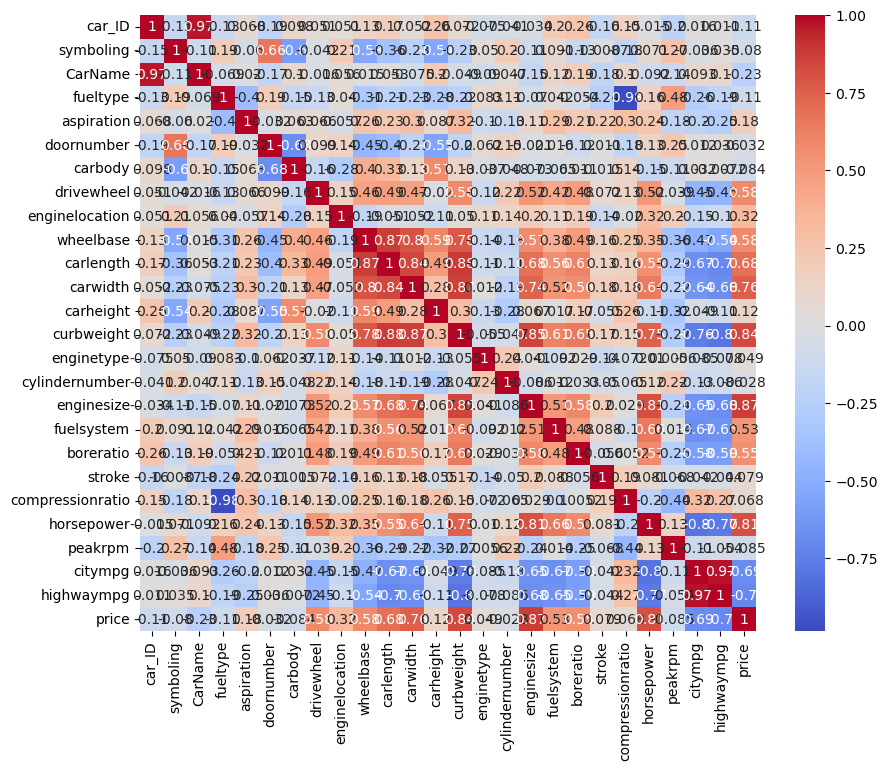

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()


# Dataset preperation for the linear regression modeling

In [39]:
X=data['enginesize'].values.reshape(-1,1)
Y=data['price'].values.reshape(-1,1)

In [40]:
type(X)

numpy.ndarray

In [41]:
X.shape

(205, 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [43]:
X_train.shape

(143, 1)

# Training

In [44]:
#Create a Linear Regression Model
model = LinearRegression()

In [45]:
# Fit the Model to the tranining data (model is being trained here...)
model.fit(X_train, y_train)

LinearRegression()

# Prediction

In [46]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation

In [47]:
# Evaluating the model (Evaluation meterics MSe, R-Squred, SSE etc...)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print("Mean Squred Error:", mse)
print("R^2 score:", r2)

Mean Squred Error: 15155485.677927306
R^2 score: 0.7835830184011543


# Plotting

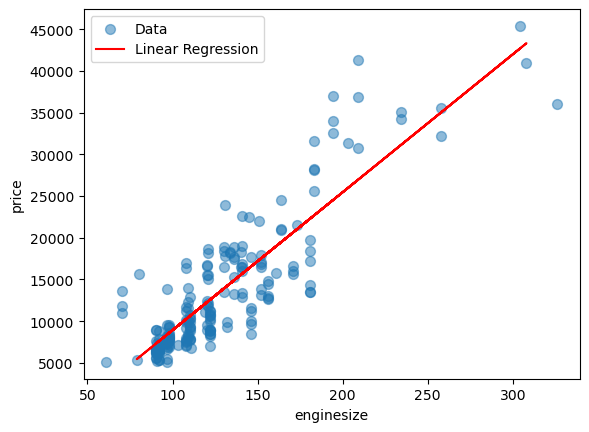

In [50]:
# Visualize the data and he linear regression line
plt.scatter(X,Y, s=50, alpha=0.5, label='Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.legend()
plt.show()

In [51]:
print(model.predict([[130]]))

[[13890.13181416]]


# Conclusion: